El objetivo de las actividades propuestas es desarrollar intuición sobre la estructura semántica subyacente en embeddings de documentos y palabras básicos generados a partir de conteos y hacer un análisis exploratorio de forma cualitativa. Para ello se trabajará con el dataset 20 Newsgroups (disponible a través de sklearn) y diferentes formas de construir embeddings de documentos y de palabras:

1- Usar las vectorizaciones disponibles en sklearn de CountVectorizer y TfidfVectorizer para construir la matriz de documento-término. Esto proveerá de embeddings para cada documento. Con esta vectorización explorar similaridad entre documentos (tomar algún documento y evaluar los documentos correspondientes con mayor similaridad), dado que el dataset provee también clasificación anotada en tópicos se aprovechar esta clasificación como elemento extra para comprobar la similaridad de documentos. Explorar vectorizar con diferentes cantidades de n-gramas. Toda exploración adicional a las mencionadas es bienvenida.
2- Repetir la exploración de similaridad de documentos pero utilizando la vectorización resultante de aplicar truncated SVD (disponible en sklearn) a la matriz de documento-término.
3- Transponer la matriz documento-término, esto resultará en la matriz término-documento que provee embeddings de palabras. Explorar similaridad entre términos.

Se tomo el código de la cátedra y se runeo el mismo para entender el funcionamiento. Se eliminaron celdas innecesarias o que no aportaban conocimiento al usuario, se jugó con parametros como unigramas, bigramas o trigramas. Se altero los números de componentes para los svd truncated para ver la diferencia, y tambien el gráfico con TSNE con el objetivo de ver la diferencia entre CountVectorizer y TfidfVectorize, siendo el primero el que se deja sobre el notebook.
Como una base para un futuro tp, se realiza como experiencia interactiva la ejecución del programa (asi como la eterna espera en TSNE).
Se deja entonces asentado que se cumplen los primeros 3 pasos de la consigna.

PASO1


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np

In [3]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [4]:
cv = TfidfVectorizer(ngram_range=(1, 2), max_df=0.2, min_df=20, max_features=None, stop_words="english")
#cv = CountVectorizer(ngram_range=(1,2), max_df=1.0, min_df=100, max_features=None, stop_words="english")

In [5]:
TNG_cv = cv.fit_transform(TNG_train.data)

In [6]:
doc_freq = np.array(TNG_cv.astype(bool).sum(axis=0)).flatten()

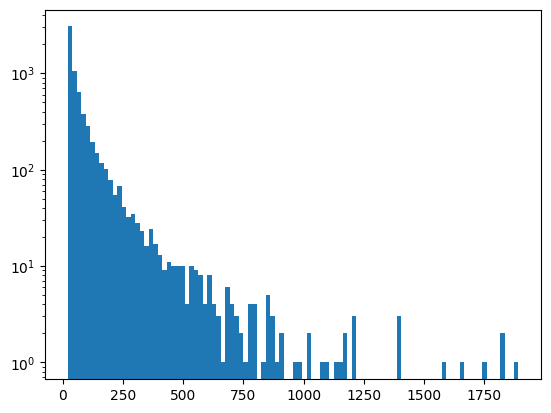

In [7]:
a = plt.hist(doc_freq, bins=100,log=True)
plt.show()

In [8]:
TNG_norm = (TNG_cv.toarray().T/(np.linalg.norm(TNG_cv.toarray(), axis=-1)+1e-8)).T

In [9]:
TNG_norm.shape

(11314, 6573)

In [10]:
cosines = np.dot(TNG_norm[87], TNG_norm.T)

In [11]:
neigh_idx = np.array(cosines).flatten().argsort()[::-1]

PASO2

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import numpy as np

In [2]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [3]:
cv = TfidfVectorizer(ngram_range=(1,1), max_df=1.0, min_df=1, max_features=None, stop_words="english")

In [4]:
TNG_cv = cv.fit_transform(TNG_train.data)

In [5]:
red = TruncatedSVD(n_components=100)
TNG_cv_red = red.fit_transform(TNG_cv)

In [6]:
np.linalg.norm(TNG_cv_red, axis=0)

array([10.47196012,  6.36402976,  5.2488807 ,  5.12262519,  5.04187303,
        4.84823745,  4.50684215,  4.43747849,  4.36757651,  4.18509925,
        4.16650201,  3.92302036,  3.84014994,  3.73886897,  3.71791951,
        3.70409255,  3.66767181,  3.63581589,  3.57790255,  3.51570601,
        3.4968321 ,  3.47875572,  3.44838987,  3.41218384,  3.37381057,
        3.35760069,  3.34540652,  3.30589503,  3.29155753,  3.28718507,
        3.26101108,  3.25802543,  3.22696132,  3.20919368,  3.20211235,
        3.19032607,  3.18722686,  3.16180792,  3.15249037,  3.1432379 ,
        3.13746335,  3.12539892,  3.11127412,  3.09355679,  3.06756084,
        3.05229542,  3.04291732,  3.03432566,  3.01866497,  3.00312044,
        2.99022043,  2.97610996,  2.96506228,  2.95839263,  2.95549083,
        2.94856589,  2.93953248,  2.92828842,  2.91261069,  2.90794203,
        2.89640268,  2.88662375,  2.87734188,  2.86009775,  2.84521551,
        2.83476529,  2.81652668,  2.81333607,  2.80386422,  2.79

In [7]:
TNG_norm = (TNG_cv_red.T/(np.linalg.norm(TNG_cv_red, axis=-1)+1e-8)).T

In [8]:
TNG_norm.shape

(11314, 100)

In [9]:
TNG_train.data[10]

'I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs\nvery well, paint is the bronze/brown/orange faded out, leaks a bit of oil\nand pops out of 1st with hard accel.  The shop will fix trans and oil \nleak.  They sold the bike to the 1 and only owner.  They want $3495, and\nI am thinking more like $3K.  Any opinions out there?  Please email me.\nThanks.  It would be a nice stable mate to the Beemer.  Then I\'ll get\na jap bike and call myself Axis Motors!\n\n-- \n-----------------------------------------------------------------------\n"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx\nirwin@cmptrc.lonestar.org    DoD #0826          (R75/6)'

In [10]:
cosines = np.dot(TNG_norm[10], TNG_norm.T)

In [11]:
max(cosines)

0.9999999204775758

In [12]:
neigh_idx = np.array(cosines).flatten().argsort()[::-1]

PASO3

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [3]:
cv = CountVectorizer(ngram_range=(1,2), max_df=1.0, min_df=100, max_features=None, stop_words="english")

In [5]:
TNG_cv = cv.fit_transform(TNG_train.data)

In [15]:
#cv = TfidfVectorizer(ngram_range=(1,2), max_df=1.0, min_df=1e-3, max_features=None, stop_words=None)

In [6]:
red = TruncatedSVD(n_components=300)
TNG_cv_red = red.fit_transform(TNG_cv.T)

In [7]:
neigh = NearestNeighbors(n_neighbors=20, metric="cosine")

In [8]:
neigh.fit(TNG_cv_red)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [9]:
NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [10]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,metric="cosine").fit_transform(TNG_cv_red)
X_embedded.shape

(1354, 2)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

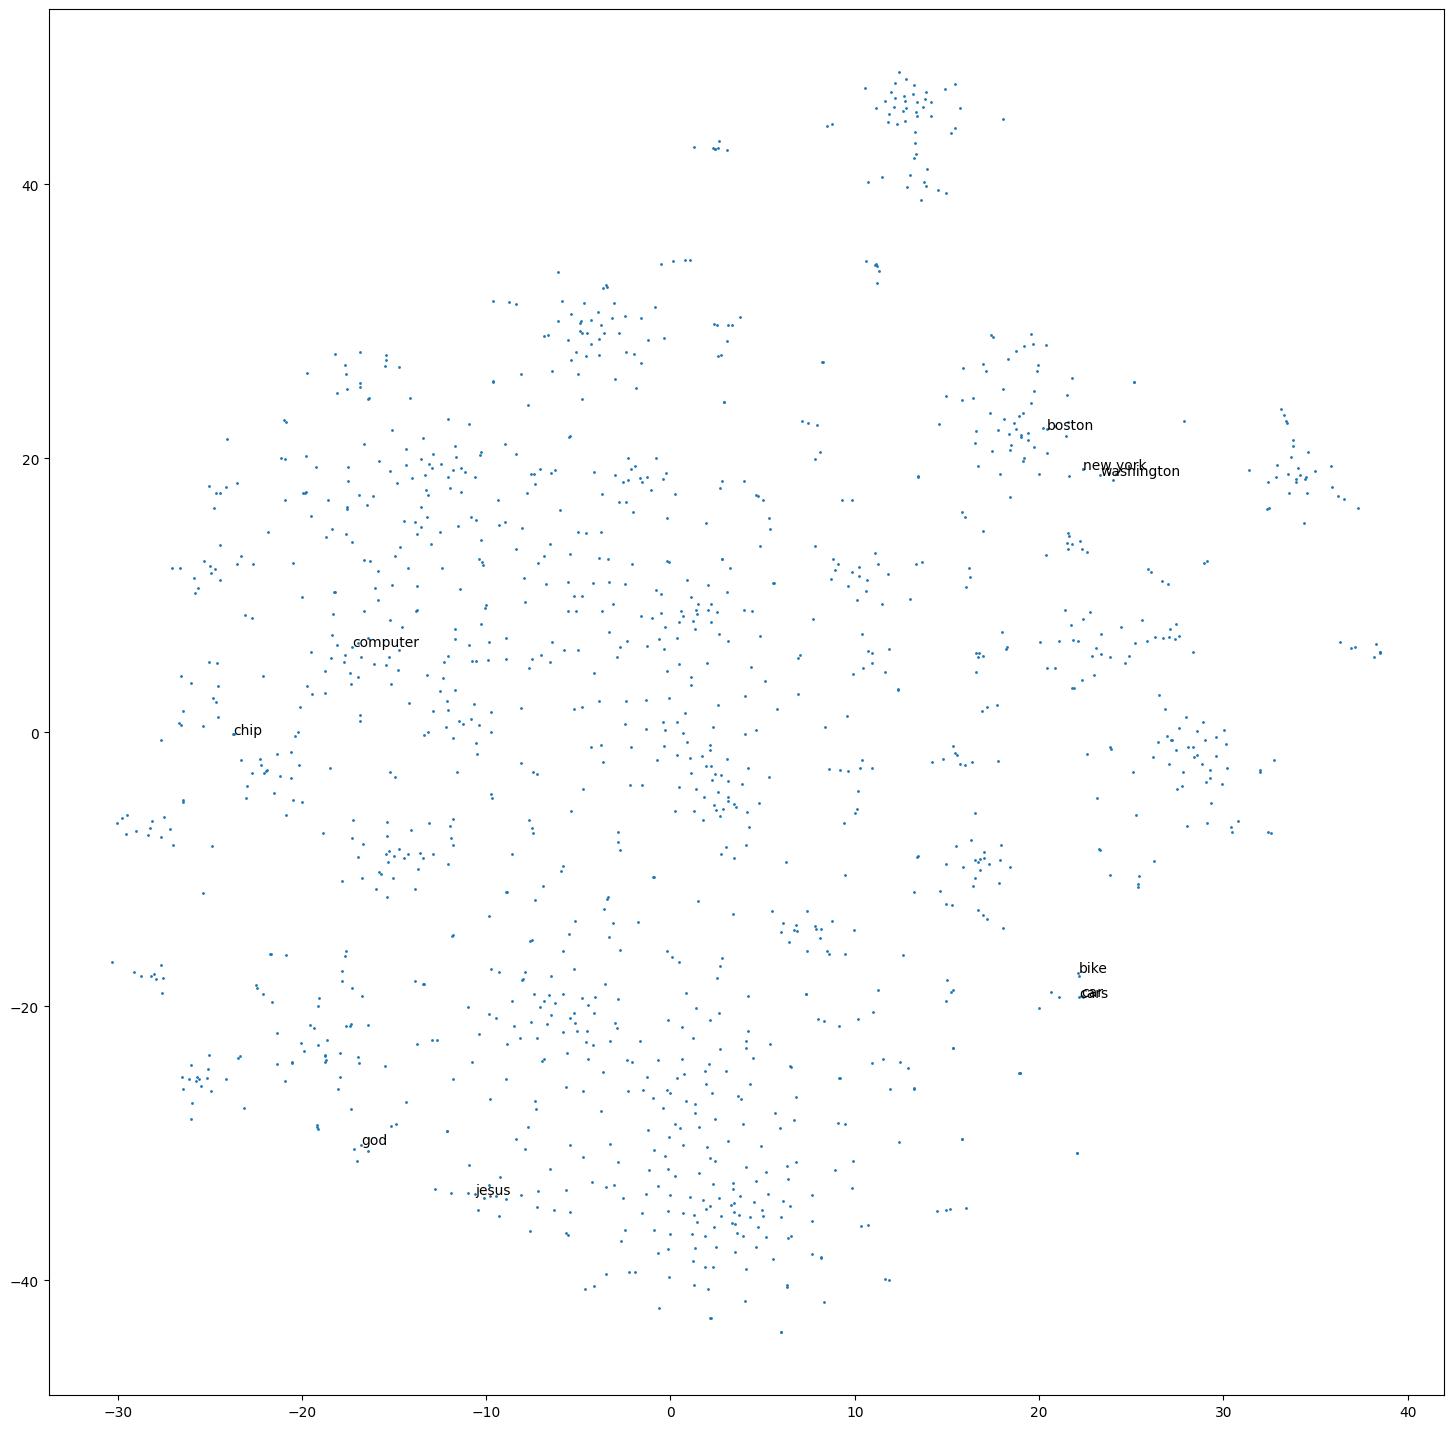

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=[18,18])
plt.scatter(X_embedded[:,0],X_embedded[:,1], s=1)
words=["car","cars","chip","computer", "god", "jesus", "boston","washington", "new york", "bike"]
for word in words:
    idx = cv.vocabulary_[word]
    plt.text(X_embedded[idx,0],X_embedded[idx,1],word)

OTRA FORMA

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Lista de documentos
documents = newsgroups.data

# Etiquetas de tópicos
labels = newsgroups.target

# Diferentes tipos de n-gramas para comparación
n_gram_ranges = [(1, 1), (2, 2), (3, 3)]

for n_gram_range in n_gram_ranges:
    print(f"\nComparando para n-gramas {n_gram_range}:")

    # Vectorización con CountVectorizer
    count_vectorizer = CountVectorizer(ngram_range=n_gram_range)
    count_matrix = count_vectorizer.fit_transform(documents)

    # Vectorización con TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(ngram_range=n_gram_range)
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Cálculo de similaridad entre documentos usando coseno
    cosine_sim_count = cosine_similarity(count_matrix)
    cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

    # Documento de muestra
    sample_doc_index = 0

    # Documentos más similares usando CountVectorizer
    similar_docs_count = cosine_sim_count[sample_doc_index].argsort()[-5:][::-1]
    print("Documentos más similares usando CountVectorizer:")
    for idx in similar_docs_count:
        similarity = round(cosine_sim_count[sample_doc_index][idx], 4)  # Redondeo a 4 decimales
        print(f"Similaridad (CountVectorizer): {similarity}, Tópico: {labels[idx]}")

    # Documentos más similares usando TfidfVectorizer
    similar_docs_tfidf = cosine_sim_tfidf[sample_doc_index].argsort()[-5:][::-1]
    print("\nDocumentos más similares usando TfidfVectorizer:")
    for idx in similar_docs_tfidf:
        similarity = round(cosine_sim_tfidf[sample_doc_index][idx], 4)  # Redondeo a 4 decimales
        print(f"Similaridad (TfidfVectorizer): {similarity}, Tópico: {labels[idx]}")



Comparando para n-gramas (1, 1):
Documentos más similares usando CountVectorizer:
Similaridad (CountVectorizer): 1.0, Tópico: 10
Similaridad (CountVectorizer): 0.7147, Tópico: 17
Similaridad (CountVectorizer): 0.7102, Tópico: 19
Similaridad (CountVectorizer): 0.7094, Tópico: 14
Similaridad (CountVectorizer): 0.7075, Tópico: 15

Documentos más similares usando TfidfVectorizer:
Similaridad (TfidfVectorizer): 1.0, Tópico: 10
Similaridad (TfidfVectorizer): 0.3883, Tópico: 10
Similaridad (TfidfVectorizer): 0.3673, Tópico: 10
Similaridad (TfidfVectorizer): 0.3347, Tópico: 10
Similaridad (TfidfVectorizer): 0.3279, Tópico: 10

Comparando para n-gramas (2, 2):
Documentos más similares usando CountVectorizer:
Similaridad (CountVectorizer): 1.0, Tópico: 10
Similaridad (CountVectorizer): 0.1521, Tópico: 10
Similaridad (CountVectorizer): 0.134, Tópico: 0
Similaridad (CountVectorizer): 0.126, Tópico: 10
Similaridad (CountVectorizer): 0.1246, Tópico: 18

Documentos más similares usando TfidfVectoriz

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Lista de documentos
documents = newsgroups.data

# Etiquetas de tópicos
labels = newsgroups.target

# Vectorización con CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Puedes ajustar n-gram_range
count_matrix = count_vectorizer.fit_transform(documents)

# Aplicar Truncated SVD a la matriz de documento-término (CountVectorizer)
for n_components in [100, 200]:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd_matrix_count = svd.fit_transform(count_matrix)

    # Calcular la similaridad entre documentos usando coseno después de Truncated SVD
    cosine_sim_svd_count = cosine_similarity(svd_matrix_count)

    # Documento de muestra
    sample_doc_index = 0

    # Documentos más similares después de Truncated SVD
    similar_docs_svd_count = cosine_sim_svd_count[sample_doc_index].argsort()[-5:][::-1]
    print(f"\nDocumentos más similares después de Truncated SVD (CountVectorizer, n_components={n_components}):")
    for idx in similar_docs_svd_count:
        print(f"Tópico: {labels[idx]}")

# Vectorización con TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Puedes ajustar n-gram_range
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Aplicar Truncated SVD a la matriz de documento-término (TfidfVectorizer)
for n_components in [100, 200]:
    svd = TruncatedSVD(n_components=n_components, random_state=28)
    svd_matrix_tfidf = svd.fit_transform(tfidf_matrix)

    # Calcular la similaridad entre documentos usando coseno después de Truncated SVD
    cosine_sim_svd_tfidf = cosine_similarity(svd_matrix_tfidf)

    # Documentos más similares después de Truncated SVD
    similar_docs_svd_tfidf = cosine_sim_svd_tfidf[sample_doc_index].argsort()[-5:][::-1]
    print(f"\nDocumentos más similares después de Truncated SVD (TfidfVectorizer, n_components={n_components}):")
    for idx in similar_docs_svd_tfidf:
        print(f"Tópico: {labels[idx]}")



Documentos más similares después de Truncated SVD (CountVectorizer, n_components=100):
Tópico: 10
Tópico: 11
Tópico: 17
Tópico: 15
Tópico: 18

Documentos más similares después de Truncated SVD (CountVectorizer, n_components=150):
Tópico: 10
Tópico: 17
Tópico: 11
Tópico: 18
Tópico: 17

Documentos más similares después de Truncated SVD (CountVectorizer, n_components=200):
Tópico: 10
Tópico: 17
Tópico: 11
Tópico: 17
Tópico: 18

Documentos más similares después de Truncated SVD (TfidfVectorizer, n_components=100):
Tópico: 10
Tópico: 10
Tópico: 10
Tópico: 10
Tópico: 10

Documentos más similares después de Truncated SVD (TfidfVectorizer, n_components=150):
Tópico: 10
Tópico: 10
Tópico: 10
Tópico: 10
Tópico: 10


crasheo la ram por eso no termino los for